# Data and project description

Link to the dataset: https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud/data 


# Libraries

In [33]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


data_file_path = r'D:\Project\Data for data science\Credit Card Fraud Detection\creditcard.csv'



# Load data files

In [34]:
data = pd.read_csv(data_file_path)
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [35]:
# Check for missing values
print("Missing values per column:")
print(data.isnull().sum())
print("\n" + "="*50)
print(f"\nTotal missing values: {data.isnull().sum().sum()}")
print(f"Percentage of missing data: {(data.isnull().sum().sum() / (data.shape[0] * data.shape[1])) * 100:.2f}%")

Missing values per column:
Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


Total missing values: 0
Percentage of missing data: 0.00%


In [36]:
# Check data types of all columns
print("Data types of all columns:")
print(data.dtypes)

Data types of all columns:
Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object


# Histogram of the amount of the transactions

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# --- Configuration ---
AMOUNT_COL = 'Amount'
CLASS_COL = 'Class'

# Define the number of bins for all histograms. User can change this value easily.
NUM_BINS = 50

# --- MOCK DATA CREATION (Replace with your actual data if running in a real environment) ---
# Since I cannot access modeling_data, I must create a mock DataFrame for execution.
# This mock data attempts to simulate the imbalanced nature and differing amount distributions.
df_fraud = data


# Ensure Amount is positive
data[AMOUNT_COL] = data[AMOUNT_COL].clip(lower=0.01)

# --- DATA SEPARATION ---
genuine_amounts = data[data[CLASS_COL] == 0][AMOUNT_COL]
fraudulent_amounts = data[data[CLASS_COL] == 1][AMOUNT_COL]
all_amounts = data[AMOUNT_COL]

# --- PLOTTING CODE ---

fig, axes = plt.subplots(3, 1, figsize=(10, 15))
plt.suptitle(f"Distribution des Montants des Transactions (Bins: {NUM_BINS})", fontsize=16)

# 1. Histogramme de TOUS les montants
axes[0].hist(all_amounts, bins=NUM_BINS, color='skyblue', edgecolor='black')
axes[0].set_title(f"1. Tous les Montants de Transactions (N={len(all_amounts)}))")
axes[0].set_xlabel("Montant (€)")
axes[0].set_ylabel("Fréquence")
axes[0].ticklabel_format(style='plain', axis='y') # Disable scientific notation on Y axis

# 2. Histogramme des montants NON FRAUDULEUX (Class 0)
axes[1].hist(genuine_amounts, bins=NUM_BINS, color='forestgreen', edgecolor='black')
axes[1].set_title(f"2. Montants de Transactions NON Frauduleuses (Class 0, N={len(genuine_amounts)})")
axes[1].set_xlabel("Montant (€)")
axes[1].set_ylabel("Fréquence")
axes[1].ticklabel_format(style='plain', axis='y')

# 3. Histogramme des montants FRAUDULEUX (Class 1)
# Note: For highly imbalanced data, the fraudulent histogram might look very sparse 
# or need logarithmic scaling on the X-axis, but we stick to the basic request.
axes[2].hist(fraudulent_amounts, bins=NUM_BINS, color='firebrick', edgecolor='black')
axes[2].set_title(f"3. Montants de Transactions FRAUDULEUSES (Class 1, N={len(fraudulent_amounts)})")
axes[2].set_xlabel("Montant (€)")
axes[2].set_ylabel("Fréquence")
axes[2].ticklabel_format(style='plain', axis='y')


plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust layout to make space for suptitle
plt.savefig("histograms_amount_by_class.png")
plt.close()

print(f"Le graphique des trois histogrammes a été sauvegardé sous 'histograms_amount_by_class.png'.")
print(f"La variable 'NUM_BINS' a été fixée à {NUM_BINS} et peut être modifiée.")

Le graphique des trois histogrammes a été sauvegardé sous 'histograms_amount_by_class.png'.
La variable 'NUM_BINS' a été fixée à 50 et peut être modifiée.


In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# --- Configuration (Variable à modifier) ---
AMOUNT_COL = 'Amount'
CLASS_COL = 'Class'

# >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
# VARIABLE QUE VOUS POUVEZ CHANGER :
NUM_BINS = 30 
# <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<

# --- PLOTTING FUNCTION AVEC ANNOTATIONS ---

def plot_histogram_with_counts(ax, data, title, color, bins):
    """Plots a histogram and adds the count on top of each bar."""
    
    # Plot histogram and get the counts (n) and the bin edges (bins)
    # Patches contains the rectangular bar objects
    n, bins, patches = ax.hist(data, bins=bins, color=color, edgecolor='black')
    
    ax.set_title(title)
    ax.set_xlabel("Montant (€)")
    ax.set_ylabel("Fréquence")
    ax.ticklabel_format(style='plain', axis='y')

    # Add count annotations on top of the bars
    for i, count in enumerate(n):
        if count > 0:
            # Get the center x position of the bar
            bin_center = (bins[i] + bins[i+1]) / 2
            
            # Use count to get the bar height
            ax.text(
                bin_center, 
                count, 
                f'{int(count)}',
                ha='center', 
                va='bottom', 
                fontsize=7, # Taille réduite
                rotation=45 # Rotation pour éviter le chevauchement
            )

# --- EXECUTE PLOTS ---
# (Assurez-vous que modeling_data, genuine_amounts, fraudulent_amounts, et all_amounts sont définis)

fig, axes = plt.subplots(3, 1, figsize=(10, 15))
plt.suptitle(f"Distribution des Montants des Transactions avec Cardinalité (Bins: {NUM_BINS})", fontsize=16)

# 1. Histogramme de TOUS les montants
plot_histogram_with_counts(
    axes[0], all_amounts, 
    f"1. Tous les Montants de Transactions (N={len(all_amounts)}))", 
    'skyblue', 
    NUM_BINS
)

# 2. Histogramme des montants NON FRAUDULEUX (Class 0)
plot_histogram_with_counts(
    axes[1], genuine_amounts, 
    f"2. Montants de Transactions NON Frauduleuses (Class 0, N={len(genuine_amounts)})", 
    'forestgreen', 
    NUM_BINS
)

# 3. Histogramme des montants FRAUDULEUX (Class 1)
plot_histogram_with_counts(
    axes[2], fraudulent_amounts, 
    f"3. Montants de Transactions FRAUDULEUSES (Class 1, N={len(fraudulent_amounts)})", 
    'firebrick', 
    NUM_BINS
)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig("histograms_amount_by_class_with_counts.png")
plt.close()

# Description of the amount of transaction per amount groups

In [10]:
import pandas as pd
import numpy as np

# --- 1. Définition des intervalles (Bins) ---
# On crée des tranches de 500 en 500 jusqu'au montant max
modeling_data = data.copy()
max_amount = modeling_data['Amount'].max()
bins = list(range(0, int(max_amount) + 500, 500))
labels = [f"{bins[i]}-{bins[i+1]}" for i in range(len(bins)-1)]

# Créer une nouvelle colonne pour les tranches de montant
modeling_data['Amount_Range'] = pd.cut(modeling_data['Amount'], bins=bins, labels=labels, include_lowest=True)

# --- 2. Calcul des statistiques groupées ---

# On groupe par la tranche de montant ET par la classe
grouped = modeling_data.groupby(['Amount_Range', 'Class'], observed=False).agg(
    Count=('Amount', 'count'),
    Sum_Amount=('Amount', 'sum')
).reset_index()

# --- 3. Calcul des pourcentages ---

# Calculer la somme totale de TOUTES les transactions dans le fichier
total_amount_overall = modeling_data['Amount'].sum()

# Calculer le pourcentage du montant de chaque groupe par rapport au total général
grouped['Percentage_of_Total_Value (%)'] = (grouped['Sum_Amount'] / total_amount_overall * 100).round(4)

# --- 4. Mise en forme pour l'affichage ---

# Pivot pour avoir une lecture plus facile (Classes 0 et 1 côte à côte pour chaque tranche)
final_report = grouped.pivot(index='Amount_Range', columns='Class', values=['Count', 'Sum_Amount', 'Percentage_of_Total_Value (%)'])

# Remplacer les valeurs NaN par 0 (au cas où une tranche n'aurait pas de fraude)
final_report = final_report.fillna(0)

print("="*90)
print("ANALYSE DES TRANSACTIONS PAR TRANCHES DE MONTANT (Bins de 500)")
print("="*90)
print(final_report)

# --- Optionnel : Afficher uniquement les tranches qui contiennent des transactions ---
active_ranges = final_report[(final_report[('Count', 0)] > 0) | (final_report[('Count', 1)] > 0)]
print("\nTranches actives uniquement :")
print(active_ranges)

ANALYSE DES TRANSACTIONS PAR TRANCHES DE MONTANT (Bins de 500)
                 Count          Sum_Amount            \
Class                0      1            0         1   
Amount_Range                                           
0-500         275208.0  457.0  15518011.37  28933.34   
500-1000        6176.0   26.0   4282396.00  17957.57   
1000-1500       1600.0    6.0   1939456.63   7796.85   
1500-2000        656.0    2.0   1134708.67   3314.61   
2000-2500        235.0    1.0    524051.41   2125.87   
2500-3000        156.0    0.0    425415.44      0.00   
3000-3500         92.0    0.0    298502.09      0.00   
3500-4000         72.0    0.0    269308.90      0.00   
4000-4500         43.0    0.0    182184.65      0.00   
4500-5000         22.0    0.0    104364.28      0.00   
5000-5500         12.0    0.0     63222.68      0.00   
5500-6000         11.0    0.0     63586.61      0.00   
6000-6500          3.0    0.0     18824.49      0.00   
6500-7000          8.0    0.0     54492.5

# Select data lines where the amount is between 100 and 1000

In [19]:
filtered_data = data[data['Amount'].between(100, 1000)]
# Display the cardinality of classes
print(f'There are {len(filtered_data[filtered_data["Class"]==0])} of class 0')
print(f'There are {len(filtered_data[filtered_data["Class"]==1])} of class 1')
filtered_data

There are 54324 of class 0
There are 121 of class 1


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
12,10.0,1.249999,-1.221637,0.383930,-1.234899,-1.485419,-0.753230,-0.689405,-0.227487,-2.094011,...,-0.231809,-0.483285,0.084668,0.392831,0.161135,-0.354990,0.026416,0.042422,121.50,0
20,16.0,0.694885,-1.361819,1.029221,0.834159,-1.191209,1.309109,-0.878586,0.445290,-0.446196,...,-0.295583,-0.571955,-0.050881,-0.304215,0.072001,-0.422234,0.086553,0.063499,231.71,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284753,172743.0,1.465737,-0.618047,-2.851391,1.425282,0.893893,-0.958325,1.508074,-0.625691,-0.369824,...,0.500426,0.870491,-0.495410,0.676929,0.787688,-0.254918,-0.117200,-0.014737,337.54,0
284754,172743.0,1.963054,-1.900613,-0.846258,-1.559943,-1.391654,-0.050767,-1.213197,-0.003610,-1.357171,...,-0.002688,0.150238,0.167155,0.696632,-0.357755,-0.242083,-0.003984,-0.022882,156.00,0
284757,172745.0,-1.757643,-0.982659,1.091540,-1.409539,-0.662159,0.046930,0.173241,0.364812,1.143381,...,-0.191471,-0.432979,-0.292549,-0.281494,-0.484349,0.366751,-0.102628,-0.458915,200.00,0
284771,172759.0,1.894910,-0.427906,-2.184267,0.159979,0.587740,-0.557966,0.510524,-0.281590,0.785446,...,0.122775,0.202373,-0.125329,0.017737,0.396759,-0.515948,-0.039485,-0.040441,124.99,0


# Plot data points

In [16]:
import plotly.express as px

# 1. Préparation des données pour le graphique
# On crée une copie pour ne pas modifier l'original et on réinitialise l'index
df_plot = filtered_data.copy().reset_index(drop=True)

# On ajoute 1 à l'index pour commencer à 1 au lieu de 0 sur l'axe X
df_plot['data_point_index'] = df_plot.index + 1

# 2. Création du graphique Plotly
fig = px.scatter(
    df_plot, 
    x='data_point_index', 
    y='Amount',
    color='Class',
    # Mapping des couleurs : 0 en bleu, 1 en rouge
    color_discrete_map={0: 'blue', 1: 'red'},
    # Configuration du survol (hover)
    hover_data={
        'Amount': ':.2f',        # Affiche le montant avec 2 décimales
        'data_point_index': True, # Affiche l'index du point
        'Class': True             # Affiche la classe
    },
    title="Montant des Transactions (100-1000) par Point de Donnée",
    labels={
        'data_point_index': 'Index du Point',
        'Amount': 'Montant ($)',
        'Class': 'Type (0: Normal, 1: Fraude)'
    }
)

# Amélioration du style
fig.update_traces(marker=dict(size=8, opacity=0.7))
fig.update_layout(template="plotly_white")

# 3. Affichage
fig.show()

In [17]:
import plotly.express as px

# 1. Filtrer pour ne garder que la Classe 1 (Fraude) 
# et réinitialiser l'index pour avoir une suite 1, 2, 3...
df_fraud_only = filtered_data[filtered_data['Class'] == 1].copy().reset_index(drop=True)
df_fraud_only['data_point_index'] = df_fraud_only.index + 1

# 2. Création du graphique Plotly
fig = px.scatter(
    df_fraud_only, 
    x='data_point_index', 
    y='Amount',
    title="Détail des Transactions Frauduleuses (Class 1) - Tranche 100-1000",
    labels={
        'data_point_index': 'N° de la Fraude',
        'Amount': 'Montant ($)'
    },
    hover_data={
        'Amount': ':.2f',
        'data_point_index': True
    }
)

# 3. Forcer la couleur en rouge et ajuster le style
fig.update_traces(marker=dict(color='red', size=10, opacity=0.8, line=dict(width=1, color='DarkSlateGrey')))
fig.update_layout(template="plotly_white")

# 4. Affichage
fig.show()

# Line plots for each column

In [ ]:

# Create line plots for each column
for column in data.columns:
    plt.figure(figsize=(12, 4))
    plt.plot(data[column], linewidth=1)
    plt.title(f"Line Plot of {column}")
    plt.xlabel("Index")
    plt.ylabel(column)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

In [27]:
# Count zeros per column
zero_counts = (data == 0).sum()
zero_percent = (zero_counts / data.shape[0]) * 100

# Print summary
print("Zero counts per column (count and percentage):")
for col in data.columns:
    print(f"{col}: {zero_counts[col]} zeros ({zero_percent[col]:.2f}%)")

# Optional: sorted DataFrame
zero_df = pd.DataFrame({'zeros': zero_counts, 'percent': zero_percent}).sort_values('zeros', ascending=False)
print("\nSorted summary (descending by zeros):")
print(zero_df)

Zero counts per column (count and percentage):
Time: 2 zeros (0.00%)
V1: 0 zeros (0.00%)
V2: 0 zeros (0.00%)
V3: 0 zeros (0.00%)
V4: 0 zeros (0.00%)
V5: 0 zeros (0.00%)
V6: 0 zeros (0.00%)
V7: 0 zeros (0.00%)
V8: 0 zeros (0.00%)
V9: 0 zeros (0.00%)
V10: 0 zeros (0.00%)
V11: 0 zeros (0.00%)
V12: 0 zeros (0.00%)
V13: 0 zeros (0.00%)
V14: 0 zeros (0.00%)
V15: 0 zeros (0.00%)
V16: 0 zeros (0.00%)
V17: 0 zeros (0.00%)
V18: 0 zeros (0.00%)
V19: 0 zeros (0.00%)
V20: 0 zeros (0.00%)
V21: 0 zeros (0.00%)
V22: 0 zeros (0.00%)
V23: 0 zeros (0.00%)
V24: 0 zeros (0.00%)
V25: 0 zeros (0.00%)
V26: 0 zeros (0.00%)
V27: 0 zeros (0.00%)
V28: 0 zeros (0.00%)
Amount: 0 zeros (0.00%)
Class: 284315 zeros (99.83%)

Sorted summary (descending by zeros):
         zeros    percent
Class   284315  99.827251
Time         2   0.000702
V1           0   0.000000
V3           0   0.000000
V4           0   0.000000
V5           0   0.000000
V2           0   0.000000
V7           0   0.000000
V8           0   0.000000


In [6]:
# count number of lines where Amount is zero and class is 1
zero_amount_fraud_count = data[(data['Amount'] == 0) & (data['Class'] == 1)].shape[0]
print(f"\nNumber of fraudulent transactions with Amount = 0: {zero_amount_fraud_count}")
# show those lines
print(data[(data['Amount'] == 0) & (data['Class'] == 1)])


Number of fraudulent transactions with Amount = 0: 27
            Time         V1         V2         V3         V4         V5  \
541        406.0  -2.312227   1.951992  -1.609851   3.997906  -0.522188   
8842     12093.0  -4.696795   2.693867  -4.475133   5.467685  -1.556758   
23308    32686.0   0.287953   1.728735  -1.652173   3.813544  -1.090927   
42756    41233.0 -10.645800   5.918307 -11.671043   8.807369  -7.975501   
69980    53658.0  -1.739341   1.344521  -0.534379   3.195291  -0.416196   
93486    64443.0   1.079524   0.872988  -0.303850   2.755369   0.301688   
93788    64585.0   1.080433   0.962831  -0.278065   2.743318   0.412364   
141257   84204.0  -0.937843   3.462889  -6.445104   4.932199  -2.233983   
141258   84204.0  -0.937843   3.462889  -6.445104   4.932199  -2.233983   
143333   85285.0  -7.030308   3.421991  -9.525072   5.270891  -4.024630   
143334   85285.0  -7.030308   3.421991  -9.525072   5.270891  -4.024630   
154587  102114.0 -28.255053  21.467203 -26.87

# create filtered data - Amount > 0 and class == 0

In [28]:
# select only rows where Amount is greater than zero and class is 0
filtered_data = data[(data['Amount'] > 0) & (data['Class'] == 0)]
print(filtered_data)

            Time         V1         V2        V3        V4        V5  \
0            0.0  -1.359807  -0.072781  2.536347  1.378155 -0.338321   
1            0.0   1.191857   0.266151  0.166480  0.448154  0.060018   
2            1.0  -1.358354  -1.340163  1.773209  0.379780 -0.503198   
3            1.0  -0.966272  -0.185226  1.792993 -0.863291 -0.010309   
4            2.0  -1.158233   0.877737  1.548718  0.403034 -0.407193   
...          ...        ...        ...       ...       ...       ...   
284802  172786.0 -11.881118  10.071785 -9.834783 -2.066656 -5.364473   
284803  172787.0  -0.732789  -0.055080  2.035030 -0.738589  0.868229   
284804  172788.0   1.919565  -0.301254 -3.249640 -0.557828  2.630515   
284805  172788.0  -0.240440   0.530483  0.702510  0.689799 -0.377961   
284806  172792.0  -0.533413  -0.189733  0.703337 -0.506271 -0.012546   

              V6        V7        V8        V9  ...       V21       V22  \
0       0.462388  0.239599  0.098698  0.363787  ... -0.01830

# Correlation matrix on filtered data

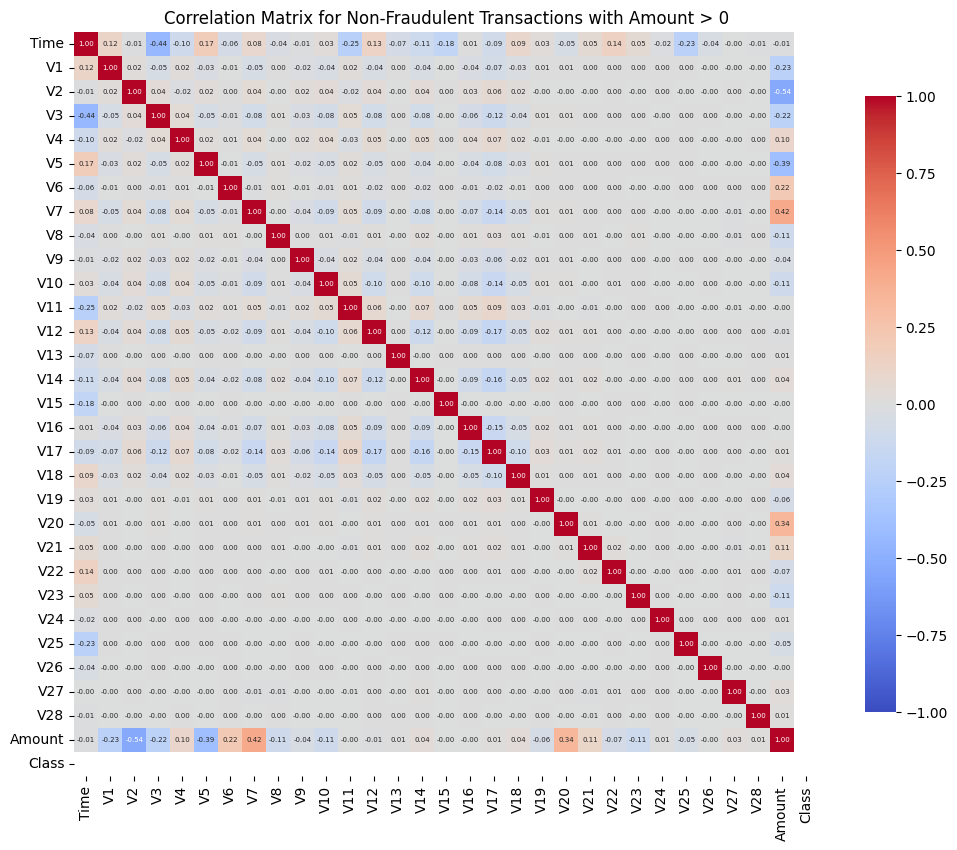

In [29]:
# build the correlation matrix on filtered_data and plot it 
corr_matrix = filtered_data.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8},
            annot_kws={"fontsize": 5}, vmin=-1,
    vmax=1)
plt.title("Correlation Matrix for Non-Fraudulent Transactions with Amount > 0")
plt.show()
plt.close()



In [30]:
modeling_data = data[(data['Amount'] > 0)]

# Prototype models

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix
import numpy as np

# --- 1. PRÉPARATION DES DONNÉES ---

# Séparer les features (X) et la cible (y)
# On exclut la colonne 'Time' et la colonne cible 'Class' de X
X = modeling_data.drop(['Time', 'Class'], axis=1)
y = modeling_data['Class']

# Normalisation des données
# Très important pour les algorithmes basés sur la distance (comme KNN) et la régularisation (Logistique)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

# Division en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, 
    test_size=0.3, 
    random_state=42, 
    stratify=y # Important pour les données déséquilibrées (fraude)
)

# --- 2. DÉFINITION ET ENTRAÎNEMENT DES CLASSIFIEURS ---

# Liste des modèles à entraîner
models = {
    "Logistic Regression": LogisticRegression(random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    # "Random Forest": RandomForestClassifier(random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5)
}

# Entraînement des modèles
print("Entraînement des modèles...")
for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train, y_train)
print("Entraînement terminé.\n")
# --- PRÉDICTIONS DES MODÈLES ---   


# Stocker les prédictions
predictions = {}
print("Génération des prédictions pour les modèles entraînés...")
for name, model in models.items():
    print(f"Predicting with {name}...")
    predictions[name] = model.predict(X_test)
    print(f"Prédictions pour {name} complétées.")
print("Prédictions générées.\n")

# --- 3. CRÉATION DES MODÈLES DE BASE (BASELINES) ---

# Modèle 1: Toujours prédire 0 (classe majoritaire, utile en cas de déséquilibre)
y_pred_baseline_zero = np.zeros(len(y_test))
predictions['Baseline - Zeros Only'] = y_pred_baseline_zero

# Modèle 2: Toujours prédire 1
y_pred_baseline_one = np.ones(len(y_test))
predictions['Baseline - Ones Only'] = y_pred_baseline_one


# --- 4. CALCUL ET COMPARAISON DES MÉTRIQUES ---

# DataFrame pour stocker les résultats des métriques
results = pd.DataFrame(columns=['Accuracy', 'Recall (Rappel)', 'Precision', 'F1-Score'])

for name, y_pred in predictions.items():
    
    # Calculer les métriques
    acc = accuracy_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    # Stocker les résultats
    results.loc[name] = [acc, rec, prec, f1]

# Afficher la table de comparaison triée par F1-Score (souvent la meilleure métrique pour la fraude)
print("="*60)
print("TABLEAU DE COMPARAISON DES PERFORMANCES DES MODÈLES")
print("="*60)
print(results.sort_values(by='F1-Score', ascending=False).round(4))

print("\n")
print("--- MATRICES DE CONFUSION POUR EXEMPLE ---")
print("Matrice de Confusion (Random Forest):")
# 11print(confusion_matrix(y_test, predictions["Random Forest"]))
print("\nMatrice de Confusion (Baseline - Zeros Only):")
print(confusion_matrix(y_test, predictions["Baseline - Zeros Only"]))

Entraînement des modèles...
Training Logistic Regression...
Training Decision Tree...
Training K-Nearest Neighbors...
Entraînement terminé.

Génération des prédictions pour les modèles entraînés...
Predicting with Logistic Regression...
Prédictions pour Logistic Regression complétées.
Predicting with Decision Tree...
Prédictions pour Decision Tree complétées.
Predicting with K-Nearest Neighbors...
Prédictions pour K-Nearest Neighbors complétées.
Prédictions générées.

TABLEAU DE COMPARAISON DES PERFORMANCES DES MODÈLES
                       Accuracy  Recall (Rappel)  Precision  F1-Score
K-Nearest Neighbors      0.9994           0.7297     0.9310    0.8182
Decision Tree            0.9992           0.7365     0.8074    0.7703
Logistic Regression      0.9992           0.6149     0.8585    0.7165
Baseline - Ones Only     0.0017           1.0000     0.0017    0.0035
Baseline - Zeros Only    0.9983           0.0000     0.0000    0.0000


--- MATRICES DE CONFUSION POUR EXEMPLE ---
Matrice de

c:\Users\franc\anaconda3\envs\ai\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.



KeyError: 'Random Forest'

In [ ]:
import pandas as pd

# Supposons que votre DataFrame est chargé dans la variable 'modeling_data'
# Si votre colonne s'appelle 'Amount', le code fonctionnera directement.
# Si votre colonne s'appelle 'Montant', remplacez 'Amount' par 'Montant'.
AMOUNT_COL = 'Amount'
CLASS_COL = 'Class'

# --- 1. Statistiques Descriptives sur le Montant par Classe ---

print("="*70)
print("1. STATISTIQUES DESCRIPTIVES DU MONTANT PAR CLASSE (0 et 1)")
print("="*70)

# Utiliser la méthode .groupby() pour séparer les données par 'Class',
# cibler la colonne 'Amount', et appliquer .agg() pour calculer les statistiques.
amount_stats = modeling_data.groupby(CLASS_COL)[AMOUNT_COL].agg(
    min_amount=('Amount', 'min'),
    max_amount=('Amount', 'max'),
    mean_amount=('Amount', 'mean'),
    std_dev_amount=('Amount', 'std')
)

# Comme vous n'avez qu'une seule colonne de montant, vous pouvez utiliser la méthode .agg() de manière plus simple :
# Solution alternative (plus simple et plus courante)
amount_stats_simple = modeling_data.groupby(CLASS_COL)[AMOUNT_COL].agg(
    ['min', 'max', 'mean', 'std']
)
# Note : Cette méthode ne renomme pas les colonnes comme vous le vouliez.

# POUR REVENIR AU NOMMAGE DEMANDÉ, UTILISONS LA PREMIÈRE SOLUTION :
amount_stats = modeling_data.groupby(CLASS_COL).agg(
    min_amount=(AMOUNT_COL, 'min'),
    max_amount=(AMOUNT_COL, 'max'),
    mean_amount=(AMOUNT_COL, 'mean'),
    std_dev_amount=(AMOUNT_COL, 'std')
)

# Affichage des résultats
print(amount_stats.round(2))
# --- 2. Statistiques de Comptage et de Pourcentage des Classes ---

print("\n\n" + "="*70)
print("2. COMPTAGE ET POURCENTAGE DES TRANSACTIONS PAR CLASSE")
print("="*70)

# Calcul du nombre total de transactions
total_records = modeling_data.shape[0]

# Calcul du nombre de records par classe
class_counts = modeling_data[CLASS_COL].value_counts()

# Calcul du pourcentage de records par classe
class_percentages = modeling_data[CLASS_COL].value_counts(normalize=True) * 100

# Création d'un DataFrame récapitulatif
class_summary = pd.DataFrame({
    'Nombre de Records': class_counts,
    'Pourcentage (%)': class_percentages.round(2)
})

# Renommer l'index pour plus de clarté
class_summary.index.name = 'Classe'

# Affichage des résultats
print(f"Nombre total de transactions : {total_records}")
print("\nRécapitulatif des Classes :")
print(class_summary)


# --- 3. Analyse approfondie des classes pour les Data Scientists ---

# Création d'un DataFrame combiné pour une vue complète
full_summary = class_summary.join(amount_stats, how='outer').round(2)
print("\n\n" + "="*70)
print("3. SYNTHÈSE COMPLÈTE (Comptage + Montants)")
print("="*70)
print(full_summary)

1. STATISTIQUES DESCRIPTIVES DU MONTANT PAR CLASSE (0 et 1)


TypeError: func is expected but received tuple in **kwargs.

In [12]:
import pandas as pd
import numpy as np
# ... (votre code précédent)

AMOUNT_COL = 'Amount'
CLASS_COL = 'Class'

# --- 1. Statistiques Descriptives sur le Montant par Classe (CORRIGÉ) ---

print("="*70)
print("1. STATISTIQUES DESCRIPTIVES DU MONTANT PAR CLASSE (0 et 1) - CORRIGÉ")
print("="*70)

# CORRECTION : Appliquer .agg() sur l'objet DataFrameGroupBy et spécifier
# la colonne à agréger dans le tuple.
amount_stats = modeling_data.groupby(CLASS_COL).agg(
    # Format : ('Nom de la nouvelle colonne', (colonne à utiliser, fonction d'agrégation))
    min_amount=(AMOUNT_COL, 'min'),
    max_amount=(AMOUNT_COL, 'max'),
    mean_amount=(AMOUNT_COL, 'mean'),
    std_dev_amount=(AMOUNT_COL, 'std')
)

# Affichage des résultats
print(amount_stats.round(2))

# Le reste de votre code (pour le comptage et les pourcentages) peut être exécuté tel quel.

1. STATISTIQUES DESCRIPTIVES DU MONTANT PAR CLASSE (0 et 1) - CORRIGÉ
       min_amount  max_amount  mean_amount  std_dev_amount
Class                                                     
0            0.01    25691.16        88.85           250.8
1            0.01     2125.87       129.31           262.3


# To Do

- Create function to split the train and test set, save it, make different type of splits and compare the results. Some of the split, a simple function can do the trick.
- When making model predictions, save the percentage along with the final classes for further analysis.
- Study the probability that the time is a good feature for the prediction.

# Conclusion

+ The data lack details about the description of the features columns which contrains us to only work on the analytical side. We are note able to evaluate the pertinence of the data column/features used to build the model.
+ On top of that, the dataset does not provide the technics or the logics used to flag the compromised transaction. Based on that we can consider buildin an automatique system to find the fraudulent or genuine transaction.
+ Even though no fraudulent transaction should be neglected, thatre should be a focus on transaction from a cretain level, meaning those transaction should receive particular attention and be treated particularly. This neeed to be decided with the data and also with the financial departement of bank.